### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

There are independent and dependet variables here. The independent variable is congruent word condition and incongruent word condition. The dependent variable is the time need to indetify of teh words.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

H_null= There is no difference in time in 2 groups:  congruent word conditions and incongruent conditions.
H_a = The average population of time between group is different.

Here I would like to use, the paired sample t-test on the data. The reasons of choosing this typeof tests are:
1)The observations are independent,
2) data is normally distributed,
3) participants read both types of texts.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [143]:
# import libraries
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import seaborn as sns
from scipy import stats, integrate
from scipy.stats import ttest_ind
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression


In [144]:
# read data and show the first 10 rows
data="stroopdata.csv"
stroopdata=pd.read_csv(data)
print(stroopdata.head(10))

   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803
5     12.238       20.878
6     14.692       24.572
7      8.987       17.394
8      9.401       20.762
9     14.480       26.282


There 3 main measures of central tendency, legendary 3M: Mode, Median and Mean. I will show mean of the in- and congurent sets.
And three measures of variability: range, variance and standart deviation.I will take standard deviation as a measure for my sample here.
        

In [145]:
# The sample mean of the congruent condition. 
AvgCongruent= np.mean(stroopdata[["Congruent"]])
# The sample mean of the incongruent condition.
AvgIncongruent=np.mean(stroopdata[["Incongruent"]])
AvgCongruent,AvgIncongruent

(Congruent    14.051125
 dtype: float64, Incongruent    22.015917
 dtype: float64)

In [146]:
#calculate the standard deviation
stroopdata.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

For visualisation I choose boxplots and histograms.

[Text(0.5,0,'Congruent and Incongruent')]

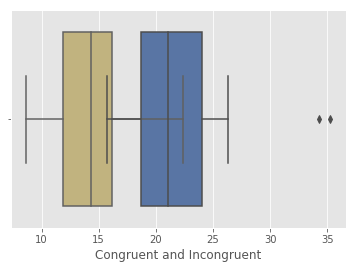

In [158]:
#plotting time required via boxplot
sns.boxplot(stroopdata.Congruent, color= "y")
sns.boxplot(stroopdata.Incongruent, color ="b").set(xlabel='Congruent and Incongruent')

[Text(0.5,0,'Congruent and Incongruent')]

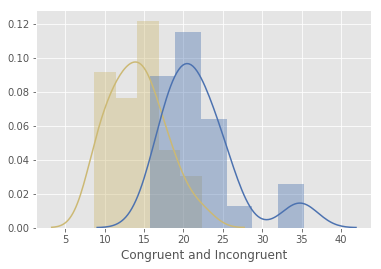

In [160]:
#plotting distributions
sns.distplot(stroopdata.Congruent, color= "y")
sns.distplot(stroopdata.Incongruent, color ="b").set(xlabel='Congruent and Incongruent')


Boxplot shows that clearly the average time spent on congruent text is smaller than incongruent. The histogram proves the point. However data does not seem to be normally distributed when we look at the histograms. Let's check the statistics.


In [162]:
#check the statistics and data distribution for Congurent
from scipy import stats
stats.shapiro(stroopdata['Congruent'])

(0.970922589302063, 0.689803421497345)

In [163]:
#check the statistics and data distribution for Incongurent
from scipy import stats
stats.shapiro(stroopdata['Incongruent'])

(0.85394686460495, 0.0025900385808199644)

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [151]:
# Perform the statistical test here
stats.ttest_rel(stroopdata['Congruent'], stroopdata['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)